<a href="https://colab.research.google.com/github/yunjinchoidev/ai/blob/main/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8_%3D%3E_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%A7%84%ED%96%89%EB%A5%A0_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [4]:
diabetes = datasets.load_diabetes()
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
diabetes.data.shape

(442, 10)

In [13]:
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [14]:
df_diab = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [15]:
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [16]:
diabetes_X = df_diab['bmi'].values.reshape(-1, 1)

In [18]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [19]:
# targets data 를 training/testing set 으로 분리

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [20]:
# regression object 생성

regr = linear_model.LinearRegression()

In [21]:
from sklearn import set_config

set_config(print_changed_only=False)

In [22]:
# training set 을 이용하여 model 훈련

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [23]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616167


In [24]:
print(regr.predict(np.array([[-0.050]])))
print(regr.predict(np.array([[0.025]])))

[106.00696876]
[176.37480836]


In [25]:
y_pred = regr.predict(diabetes_X_test)

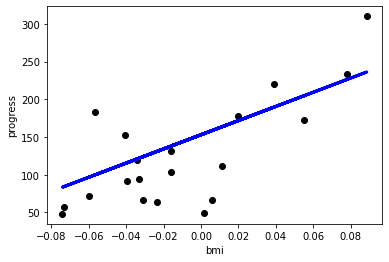

In [26]:
# visualization

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('bmi') 
plt.ylabel('progress')
plt.show()

In [27]:
print("결정계수 : {:.2f}".format(r2_score(diabetes_y_test, y_pred)))

결정계수 : 0.47


In [28]:
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [29]:
# 모든 feature 를 사용
diabetes_X = df_diab.values

In [30]:
diabetes_X.shape

(442, 10)

In [31]:
# 데이터를 train/test 세트로 분할
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [32]:
# target을 train/test 세트로 분할
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [33]:
# linear regression object 생성
regr = linear_model.LinearRegression()

In [34]:
# 학습 세트를 사용하여 모델 학습
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [35]:
# 테스트 세트를 사용하여 예측하기
diabetes_y_pred = regr.predict(diabetes_X_test)

In [36]:
# R2 계산 
print("결정계수: {:.2f}".format(r2_score(diabetes_y_test, diabetes_y_pred)))

결정계수: 0.59
